# Authors: Yuan Gao, Jiawei Gao  

In [1]:
import numpy as np
import pandas as pd
import json
import requests
import time
from bs4 import BeautifulSoup
import os
import matplotlib.pyplot as plt
import pandas as pd
import pylab
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes
import unittest
import copy

In [2]:
class lic:
    def __init__(self, key, name, spdx_id, url, node_id):
        self.key = key
        self.name = name
        self.spdx_id = spdx_id
        self.url = url
        self.node_id = node_id
        
    def to_str(self):
        dic = {}
        dic["key"] = self.key
        dic["name"] = self.name
        dic["spdx_id"] = self.spdx_id
        dic["url"] = self.url
        dic["node_id"] = self.node_id
        str1= "\"" + str(dic) + "\""
        return str1

In [3]:
class pull_request_info():
    def __init__(self, owner, name, number):
        res = requests.get("https://api.github.com/repos/" + owner + "/" + name + "/pulls/" + str(number) + "?access_token=8403d54375bcfc49b96ee7bceb2703430d38c91b")
        res_json = res.json()
        
        self.owner = owner
        self.name = name

        #print(res_json)
        if res_json["title"] != None:
            self.title = "\"" + res_json["title"].replace('\"', '\\"').replace("\r", " ").replace("\n", " ").replace(",", " ")  + "\""
        else:
            self.title = "None"
        
        self.number = res_json["number"]
        
        self.body = res_json["body"]
        if res_json["body"] != "" :
            self.body = "\"" + self.body.replace('\"', '\\"').replace("\r", " ").replace("\n", " ").replace(",", " ") + "\""
        else : 
            self.body = "None"
            
        self.state = res_json["state"]
        self.created_at = res_json["created_at"]
        if self.state == "closed":
            self.closed_at = res_json["closed_at"]
        else :
            self.closed_at = "Null"
        self.user = res_json["user"]["login"]
        self.commits = res_json["commits"]
        self.additions = res_json["additions"]
        self.deletions = res_json["deletions"]
        self.changed_files = res_json["changed_files"]
        
    def to_CSV(self):
        path = "./projects"
        filename = path + "/" + self.owner + "-" + self.name + ".csv"
        #print(filename)
        #print(self.body)
        header = "title," + "number," + "state," + "created_at," + "user," + "commits," + "additions," + "deletions," + "changed_files," + "closed_at," + "body\n"
        content = self.title + "," + str(self.number) + "," + self.state + "," + self.created_at + "," + self.user + "," + str(self.commits) + "," + str(self.additions) + "," + str(self.deletions) + "," + str(self.changed_files) + "," + self.closed_at + "," + self.body + "\n"
        if os.path.exists(path) == False:
            os.mkdir(path)
        if os.path.exists(filename) == False:
            fd = open(filename, "a+", encoding = "utf8")
            fd.writelines(header)
            fd.writelines(content)
            fd.close()
            #print("not exist")
        else :
            fd = open(filename, "a+", encoding='utf8')
            fd.writelines(content)
            fd.close()
            #print("exist")
            
            
        #path = "./projects"
        filename = path + "/allProject.csv"
        #print(filename)
        #print(self.body)
        header = "title," + "number," + "state," + "created_at," + "user," + "commits," + "additions," + "deletions," + "changed_files," + "closed_at," + "body\n"
        content = self.title + "," + str(self.number) + "," + self.state + "," + self.created_at + "," + self.user + "," + str(self.commits) + "," + str(self.additions) + "," + str(self.deletions) + "," + str(self.changed_files) + "," + self.closed_at + "," + self.body + "\n"
        if os.path.exists(path) == False:
            os.mkdir(path)
        if os.path.exists(filename) == False:
            fd = open(filename, "a+", encoding = "utf8")
            fd.writelines(header)
            fd.writelines(content)
            fd.close()
            #print("not exist")
        else :
            fd = open(filename, "a+", encoding='utf8')
            fd.writelines(content)
            fd.close()
            #print("exist")

In [26]:
class user_info:
    def __init__(self, login, logins):
        print(login)
        #print(logins)
        self.login = login
        self.num_pull_req = 0
        self.has_a_twitter = 1
        self.personal_account = 1
        for item in logins:
            if item == login:
                self.num_pull_req = self.num_pull_req + 1
        res = requests.get("https://twitter.com/" + login)
        if res.status_code == 404:
            self.has_a_twitter = 0
        res1 = requests.get("https://github.com/" + login)
        soup = BeautifulSoup(res1.text, "html.parser")
        infos = soup.find_all("span", "Counter hide-lg hide-md hide-sm")
        if len(infos) != 5:
            self.personal_account = 0
        else:
            self.num_repo = int(infos[0].get_text().strip().replace("k", "000").replace(",", "").replace(",", "").replace(".", ""))
            self.num_followers = int(infos[3].get_text().strip().replace("k", "000").replace(",", "").replace(".", ""))
            self.num_following = int(infos[4].get_text().strip().replace("k", "000").replace(",", "").replace(".", ""))
            self.contributions_last_year = int(soup.find_all("h2", "f4 text-normal mb-2")[0].get_text().strip().split(" ")[0].replace(",", "").replace(".", ""))

    def to_CSV(self):
        filename = "users.csv"
        header = "login," + "num_pull_req," + "has_a_twitter," + "num_repo," + "num_followers," + "num_following," + "contributions_last_year\n"
        if self.personal_account == 1:
            content = self.login + "," + str(self.num_pull_req) + "," + str(self.has_a_twitter) + "," + str(self.num_repo) + "," + str(self.num_followers) + "," + str(self.num_following) + "," + str(self.contributions_last_year) + "\n"
        if os.path.exists(filename) == False:
            fd = open(filename, "a+", encoding = "utf8")
            fd.writelines(header)
            if self.personal_account == 1:
                fd.writelines(content)
            fd.close()
        else :
            if self.personal_account == 1:
                dataset = pd.read_csv("users.csv")
                if len(dataset[dataset["login"] == self.login]) == 0 :
                    fd = open(filename, "a+", encoding = "utf8")
                    fd.writelines(content)
                    fd.close()

In [33]:
class project_info(lic, pull_request_info, user_info):
    def __init__(self, owner, name):
        res = requests.get("https://api.github.com/repos/" + owner + "/" + name + "?access_token=8403d54375bcfc49b96ee7bceb2703430d38c91b")
        res_json = res.json()
        self.owner = res_json["owner"]["login"]
        self.name = res_json["name"]
        
        if res_json["description"] != None:
            self.description = "\"" + res_json["description"].replace('\"', '\\"').replace("\r", " ").replace("\n", " ").replace(",", " ")  + "\""
        else :
            self.description = "None"
        
        if res_json["homepage"] != None:
            self.homepage = res_json["homepage"]
        else :
            self.homepage = "None"
        
        if res_json["license"] != None:
            self.license = lic(res_json["license"]["key"], res_json["license"]["name"], res_json["license"]["spdx_id"], res_json["license"]["url"], res_json["license"]["node_id"])
        else :
            self.license = res_json["license"]
            
        self.forks = res_json["forks_count"]
        self.watchers = res_json["watchers_count"]
        self.date_of_collection = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        self.stars = res_json["stargazers_count"]
        self.pull_requests_list = []
        self.logins = []
        self.user_info_list = []
        self.num_users = 0
        self.get_pull_request_info()
        self.get_user_info()
        self.to_CSV()
        for item in self.user_info_list:
            item.to_CSV()
        for item in self.pull_requests_list:
            item.to_CSV()
    
    def __str__(self):
        return self.owner + "/" + self.name + ": " + self.description + "(" + str(self.stars) + " stars" + ")"

    def to_CSV(self):
        filename = "./projects.csv"
        header = "owner," + "name," + "description," + "homepage," + "forks," + "watchers," + "date_of_collection," + "license\n" 
        content = self.owner + "," + self.name + "," + self.description + "," + self.homepage + "," + str(self.forks) + "," + str(self.watchers) + "," + self.date_of_collection + ","
        
        if self.license == None:
            content += "None\n"
        else :
            content += (self.license.to_str() + "\n")
        
        if os.path.exists(filename) == True :
            #print("exist")
            fd = open(filename, "a+", encoding = "utf8")
            fd.writelines(content)
            fd.close()
        else :
            fd = open(filename, "a+", encoding = "utf8")
            fd.writelines(header)
            fd.writelines(content)
            fd.close()
            #print("not exist")
            
    def get_pull_request_info(self):
        res = requests.get("https://api.github.com/search/issues?q=is:pr+repo:" + self.owner + "/" + self.name)#  + "?access_token=8403d54375bcfc49b96ee7bceb2703430d38c91b")
        res_json = res.json()
        items = res_json["items"]
        #print(len(items))
        for item in items:
            self.pull_requests_list.append(pull_request_info(self.owner, self.name, item["number"]))
            self.logins.append(item["user"]["login"])
            
    def get_user_info(self):
        res = requests.get("https://api.github.com/search/issues?q=is:pr+repo:" + self.owner + "/" + self.name + "?access_token=8403d54375bcfc49b96ee7bceb2703430d38c91b")
        logins_tmp = list(set(self.logins))
        self.num_users = len(logins_tmp)
        for login in logins_tmp:
            self.user_info_list.append(user_info(login, self.logins))
    
    def summary(self):
        state_open = 0
        state_closed = 0
        for item in self.pull_requests_list:
            if item.state == open:
                state_open = state_open + 1
            else :
                state_closed = state_closed + 1
        
        initial_time = self.pull_requests_list[0].created_at
        for item in self.pull_requests_list:
            if item.created_at < initial_time:
                initial_time = item.created_at
        
        target = self.pull_requests_list[0]
        for item in self.pull_requests_list:
            if item.created_at == initial_time:
                target = item
        
        count_twitter = 0
        for item in self.user_info_list:
            if item.has_a_twitter == 1:
                count_twitter = count_twitter + 1
        
        print(" number of pull requests in open state: %d\n \
                number of pull requests in closed state: %d\n \
                number of users: %d\n \
                date of the oldest pull requested: %s\n \
                number of users with a valid twitter account: %d\n \
              " %(state_open, state_closed, self.num_users, target.created_at, count_twitter))        

In [6]:
def start_get_data(owner, name):
    res = requests.get("http://github.com/" + owner + "/" + name)
    if res.status_code == 404:
        print("\033[1;31;40mno such repo!\033[0m")
        return False
    return project_info(owner, name)

In [7]:
def list_all_repo():
    if os.path.exists("projects.csv") == False:
        print("no repo collected!")
        return
    dataset = pd.read_csv("projects.csv", usecols = ["owner", "name"])
    print(dataset)

In [8]:
def list_pull_req_from_repo():
    if os.path.exists("projects.csv") == False:
        print("no repo collected!")
        return
    print("please select one from repos listed:")
    dataset = pd.read_csv("projects.csv", usecols = ["owner", "name"])
    print(dataset)
    index = int(input("please input the index of the repo (from the first column shown above):"))
    repo = dataset.loc[index]
    file = "./projects/" + repo["owner"] + "-" + repo["name"] + ".csv"
    pull_reqs = pd.read_csv(file, usecols = ["number", "title"])
    print(pull_reqs)

In [9]:
def summary_of_repo():
    if os.path.exists("projects.csv") == False:
        print("no repo collected!")
        return
    print("please select one from repos listed:")
    dataset = pd.read_csv("projects.csv", usecols = ["owner", "name"])
    print(dataset)
    index = int(input("please input the index of the repo (from the first column shown above):"))
    repo = dataset.loc[index]
    file = "./projects/" + repo["owner"] + "-" + repo["name"] + ".csv"
    dataset = pd.read_csv(file)
    state_closed = len(dataset[dataset.state == "closed"])
    state_open = len(dataset[dataset.state == "open"])
    num_users = len(dataset.user.unique())
    tmp = dataset.sort_values("created_at", ascending = False)
    created_at = tmp.loc[len(tmp) - 1].created_at
    users = dataset.user.unique().tolist()
    count_twitter = 0
    user_set = pd.read_csv("users.csv")
    for user in users:
        tmp = user_set[user_set.login == user]
        tmp1 = tmp[tmp.has_a_twitter == 1]
        #print(len(tmp1))
        if len(tmp1) != 0:
            count_twitter = count_twitter + 1
    print("-------------------summary---------------------:")
    print("            number of pull requests in open state: %d\n \
            number of pull requests in closed state: %d\n \
            number of users: %d\n \
            date of the oldest pull requested: %s\n \
            number of users with a valid twitter account: %d\n \
          " %(state_open, state_closed, num_users, created_at, count_twitter))
    

In [10]:
# Set color for the plot
def setBoxColors(bp):
    setp(bp['boxes'][0], color='blue')
    setp(bp['caps'][0], color='blue')
    setp(bp['caps'][1], color='blue')
    setp(bp['whiskers'][0], color='blue')
    setp(bp['whiskers'][1], color='blue')
    setp(bp['fliers'][0], color='blue')
    setp(bp['fliers'][1], color='blue')
    setp(bp['medians'][0], color='blue')

    setp(bp['boxes'][1], color='red')
    setp(bp['caps'][2], color='red')
    setp(bp['caps'][3], color='red')
    setp(bp['whiskers'][2], color='red')
    setp(bp['whiskers'][3], color='red')
    setp(bp['medians'][1], color='red')

In [11]:
def create_graphics_repo(owner,name):
    path = "./projects"
    filename = path + "/" + owner + "-" + name + ".csv"
    dataset = pd.read_csv(filename)
    
    opened = dataset.state=="open"
    closed = dataset.state=="closed"
    
    set_opened = dataset[opened]
    set_closed = dataset[closed]

    A= [set_opened['commits'],  set_closed['commits']]
    B = [set_opened['additions'],  set_closed['additions']]
    C = [set_opened['deletions'],  set_closed['deletions']]

    fig = figure(figsize=(10,5))
    ax = axes()

    # first boxplot pair
    bp = boxplot(A, positions = [1, 2], widths = 0.6)
    setBoxColors(bp)

    # second boxplot pair
    bp = boxplot(B, positions = [4, 5], widths = 0.6)
    setBoxColors(bp)

    # thrid boxplot pair
    bp = boxplot(C, positions = [7, 8], widths = 0.6)
    setBoxColors(bp)


    # set axes limits and labels
    #xlim(0,9)
    #ylim(0,10000)
    ax.set_xticklabels(['commits', 'additions', 'deletions'])
    ax.set_xticks([1.5, 4.5, 7.5])

    # draw temporary red and blue lines and use them to create a legend
    hB, = pylab.plot([1,1],'b-')
    hR, = pylab.plot([1,1],'r-')
    legend((hB, hR),('states: open', 'states: closed'))
    hB.set_visible(False)
    hR.set_visible(False)

    savefig('boxcompare.png')
    show()



    fig = plt.figure(figsize=(20,10))

    plt.subplot(1, 3, 1)

    result= dataset.groupby(["user"]).sum()

    #print(result.changed_files)
    #result.boxplot(column = ['changed_files'])
    #plt.figure()
    plot = plt.boxplot(result.changed_files)
    plt.title("Boxplot Comparing the Number of Changed Files Grouped by the Author Association")
    #plt.show()
    #result.boxplot(by = result.index, column = ["changed_files"], showfliers=True, grid=False)


    plt.subplot(1, 3, 2)
    plt.scatter(x = dataset.additions,y = dataset.deletions, s = 50)
    plt.title("Scatterplot: Additions vs Deletions")
    plt.xlabel("Additions")
    plt.ylabel("Deletions")
    #plt.show()

    plt.subplot(1, 3, 3)
    plot = dataset['commits'].plot.hist()#(bins=200)
    #plt.bar(x=dataset.index, height=dataset.commits,width=2)
    plt.title("Histogram: Number of Commits per Pull Request")
    plt.show()

In [12]:
def create_graphics_all():
    path = "./projects"
    filename = path + "/" + "allProject.csv"
    
    if os.path.exists(path) == False:
        print("\033[;31;40mAll of the repos have no pull requests!\033[0m")
        return
    
    dataset = pd.read_csv(filename)

    opened = dataset.state=="open"
    closed = dataset.state=="closed"
    
    result = copy.deepcopy(dataset)
    result["day"] = result['created_at']
    result["day"] = result['day'].str.split('T',expand=True)
    result["sums"] = np.ones(len(result))
    
    set_opened = result[opened]
    set_closed = result[closed]
    
    set_opened_day = set_opened.groupby(["day"]).sum()
    set_opened_day = set_opened_day.sort_values("day", ascending = True)

    set_closed_day = set_closed.groupby(["day"]).sum()
    set_closed_day = set_closed_day.sort_values("day", ascending = True)

    fig = plt.figure(figsize=(20,10))
    plt.subplot(2, 1, 1)
    plt.plot(set_opened_day.index, set_opened_day['sums'])
    plt.xlabel("Time")
    plt.ylabel("The number of pull request")
    plt.title("The number of open pull requests per day")

    plt.subplot(2, 1, 2)
    plt.plot(set_closed_day.index, set_closed_day['sums'])
    plt.xlabel("Time")
    plt.ylabel("The number of pull request")
    plt.title("The number of closed pull requests per day")

    
    fig = plt.figure(figsize=(20,10))
    
    plt.subplot(1, 2, 1)
    path = "./projects"
    for i,j,k in os.walk(path):
        k
    k.remove('allProject.csv')
    if os.path.exists("./projects/.DS_Store") == True:
        k.remove('.DS_Store')
    files = copy.deepcopy(k)
    num_user=[]
    while(len(k)):
        filename = path + "/" + k.pop()
        print(filename)
        dataset = pd.read_csv(filename)
        size  = len(dataset.user.unique())
        num_user.append(size)
    plt.bar(x=files, height=num_user)
    plt.xlabel("Repo")
    plt.ylabel("The Number of Users")
    
    plt.subplot(1, 2, 2)
    #plt.bar(x=dataset.index, height=dataset.commits,width=2)
    plot = result['commits'].plot.hist()#(bins=200)
    plt.xlabel("index")
    plt.ylabel("Number of Commits")
    plt.show()

In [13]:
def corr_between_datas():
    
    filename = "users.csv"
    dataset = pd.read_csv(filename, usecols=["num_pull_req", "contributions_last_year", "num_followers", "num_following"])
    print(dataset.corr())

In [14]:
def corr_in_pull_request(owner, name):
    path = "./projects"
    filename = path + "/" + owner + "-" + name + ".csv"
    dataset = pd.read_csv(filename)
    print(dataset.corr())

please input one option between 1 to 9:
              1---request the systen to collect data for a specific repo.
              2---list repos collected
             3---list all pull requests from a repo.
              4---list the summary of a repo
              5---create graphics given a repo
             6---create graphics considering ALL pull requests from all repos.
             7---calculate the correlation between the data collected for a user (following, followers, number of pull requests, number of contributions, etc.).
             8---calculate the correlation between all the numeric data in the pull requests for a repo.
             9---exit.
             0
you give the invalid option: 0
Press enter to continue!


please input one option between 1 to 9:
              1---request the systen to collect data for a specific repo.
              2---list repos collected
             3---list all pull requests from a repo.
              4---list the summary of a repo
          

Press enter to continue!


please input one option between 1 to 9:
              1---request the systen to collect data for a specific repo.
              2---list repos collected
             3---list all pull requests from a repo.
              4---list the summary of a repo
              5---create graphics given a repo
             6---create graphics considering ALL pull requests from all repos.
             7---calculate the correlation between the data collected for a user (following, followers, number of pull requests, number of contributions, etc.).
             8---calculate the correlation between all the numeric data in the pull requests for a repo.
             9---exit.
             4
please select one from repos listed:
             owner             name
0  igorsteinmacher  INF502-Fall2019
1            rails            rails
2       jaywcjlove    linux-command
please input the index of the repo (from the first column shown above):2
-------------------summary------------

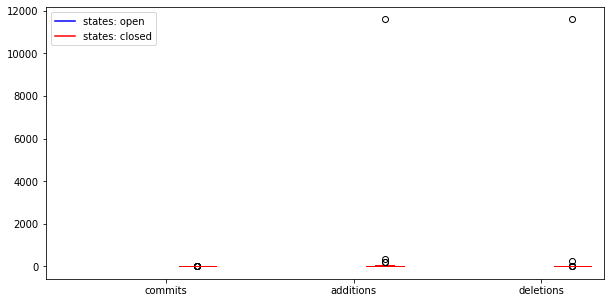

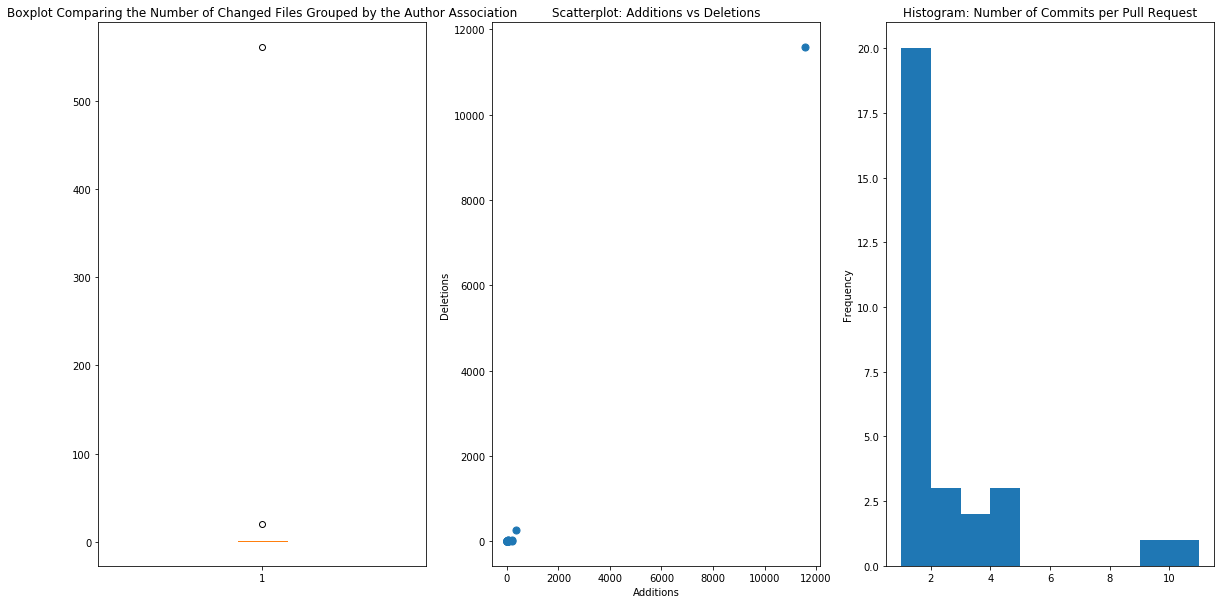

Press enter to continue!


please input one option between 1 to 9:
              1---request the systen to collect data for a specific repo.
              2---list repos collected
             3---list all pull requests from a repo.
              4---list the summary of a repo
              5---create graphics given a repo
             6---create graphics considering ALL pull requests from all repos.
             7---calculate the correlation between the data collected for a user (following, followers, number of pull requests, number of contributions, etc.).
             8---calculate the correlation between all the numeric data in the pull requests for a repo.
             9---exit.
             6
./projects/rails-rails.csv
./projects/jaywcjlove-linux-command.csv
./projects/igorsteinmacher-INF502-Fall2019.csv


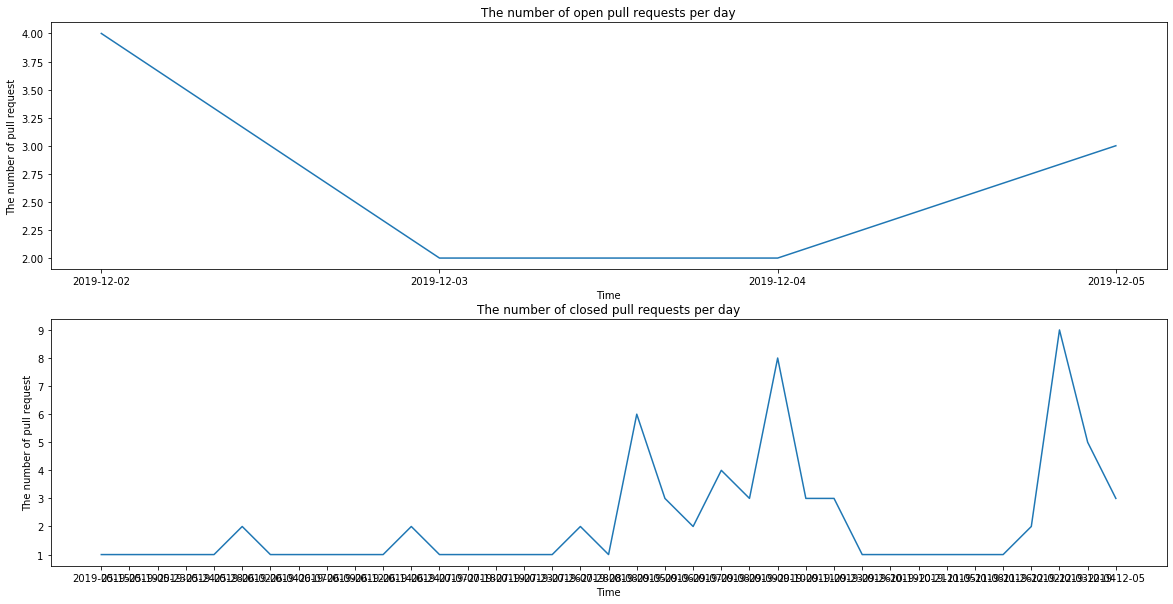

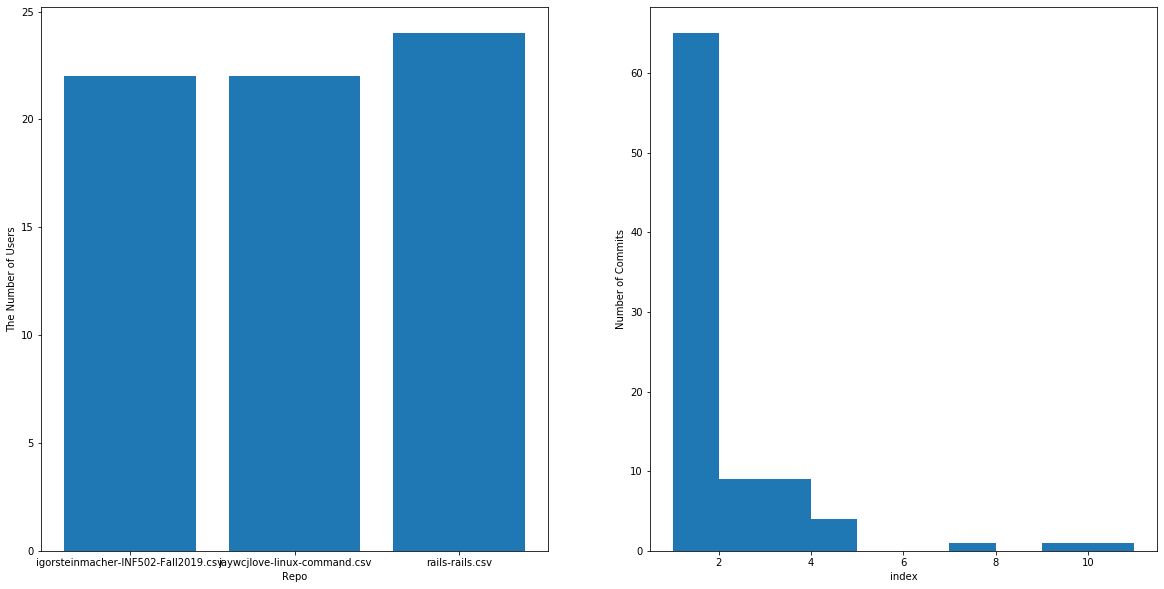

Press enter to continue!


please input one option between 1 to 9:
              1---request the systen to collect data for a specific repo.
              2---list repos collected
             3---list all pull requests from a repo.
              4---list the summary of a repo
              5---create graphics given a repo
             6---create graphics considering ALL pull requests from all repos.
             7---calculate the correlation between the data collected for a user (following, followers, number of pull requests, number of contributions, etc.).
             8---calculate the correlation between all the numeric data in the pull requests for a repo.
             9---exit.
             7
                         num_pull_req  num_followers  num_following  \
num_pull_req                 1.000000       0.033688      -0.039707   
num_followers                0.033688       1.000000      -0.015941   
num_following               -0.039707      -0.015941       1.000000   
contribu

In [35]:
if __name__ == "__main__":
    flag = 1
    while True:
        option = input("please input one option between 1 to 9:\n  \
            1---request the systen to collect data for a specific repo.\n  \
            2---list repos collected\n \
            3---list all pull requests from a repo.\n  \
            4---list the summary of a repo\n  \
            5---create graphics given a repo\n \
            6---create graphics considering ALL pull requests from all repos.\n \
            7---calculate the correlation between the data collected for a user (following, followers, number of pull requests, number of contributions, etc.).\n \
            8---calculate the correlation between all the numeric data in the pull requests for a repo.\n \
            9---exit.\n \
            ")
        #option = int(option)
        try:
            option = int(option)
        except ValueError:
            print("you give the invalid option: %s" %option)
            input("\033[;31;40mPress enter to continue!\n\n\033[0m")
            continue
        else:
            if (option>9 or option<1):
                print("you give the invalid option: %s" %option)
                input("\033[;31;40mPress enter to continue!\n\n\033[0m")
                continue
        
        if option == 9:
            print("\033[;31;40mexited!\033[0m")
            break
        
        if option != 1:
            if os.path.exists("projects.csv") == False:
                print("no repo collected, please collect data first!")
                option = 1
                flag = 0
            if os.path.exists("users.csv") == False:
                print("no users info collected, please collect data first!")
                option = 1
                flag = 0
            if flag == 0:
                print("\033[;31;40mplease input a repo owner and name, respectively!\033[0m")
                    
        if option == 1:
            owner = input("input the repo owner name:")
            name = input("input the repo name:")
            if os.path.exists("projects.csv") == True:
                dataset = pd.read_csv("projects.csv", usecols = ["owner", "name"])
                b1 = dataset[dataset["owner"] == owner]
                if b1.shape[0] != 0:
                    if len(b1[b1["name"] == name]):
                        print("\033[;31;40malready collected this repo, try to give another option!\033[0m")
                        input("\033[;31;40mPress enter to continue!\n\n\033[0m")
                        continue
            print("Loading ...")
            start_get_data(owner, name)
        elif option == 2:
            list_all_repo()
        elif option == 3:
            list_pull_req_from_repo()
        elif option == 4:
            summary_of_repo()
        elif option == 5:
            print("please select one from repos listed:")
            dataset = pd.read_csv("projects.csv", usecols = ["owner", "name"])
            print(dataset)
            index = int(input("please input the index of the repo (from the first column shown above):"))
            repo = dataset.loc[index]
            create_graphics_repo(repo["owner"], repo["name"])
        elif option == 6:
            create_graphics_all()
        elif option == 7:
            corr_between_datas()
        elif option == 8:
            print("please select one from repos listed:")
            dataset = pd.read_csv("projects.csv", usecols = ["owner", "name"])
            print(dataset)
            index = int(input("please input the index of the repo (from the first column shown above):"))
            repo = dataset.loc[index]
            corr_in_pull_request(repo["owner"], repo["name"])
        
        input("\033[;31;40mPress enter to continue!\n\n\033[0m")

In [34]:
class ProjectTestCase(unittest.TestCase, project_info):
    @classmethod
    def setUpClass(cls):
        cls.res = start_get_data("igorsteinmacher", "INF502-Fall2019")
    def test_pull_req_csv(self):
        path = "./projects/"
        filename = self.__class__.res.owner + "-" + self.__class__.res.name + ".csv"
        file = path + filename
        self.assertTrue(os.path.exists(file))
    def test_users_csv(self):
        self.assertTrue(os.path.exists("users.csv"))
    def test_projects_csv(self):
        self.assertTrue(os.path.exists("projects.csv"))
    def test_forks(self):
        self.assertEqual(29, self.res.forks)
    def test_user_info(self):
        dataset = pd.read_csv("./projects/igorsteinmacher-INF502-Fall2019.csv")
        count = dataset.shape[0]
        self.assertTrue(count % 30 == 0)        
        
if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit = False)

Vinod289
jkeany10
Pengkai-Fang
Shawn-Armour
CQuinn8
as4378
FelicityE
pjdeasy
YuanGao-NAU
iShafkat
DoanNguyenTrong
juntingchen-95
LugwellDR
lqk67506
arvinnatadihardja
liujt196
LimingZheng-NAU
vietanhle0101
kb629
gonzalezivan90
CameronBodine
yfoo
Laura-Puckett
JiaweiGao21


test_forks (__main__.ProjectTestCase) ... ok
test_projects_csv (__main__.ProjectTestCase) ... ok
test_pull_req_csv (__main__.ProjectTestCase) ... ok
test_user_info (__main__.ProjectTestCase) ... ok
test_users_csv (__main__.ProjectTestCase) ... ok

----------------------------------------------------------------------
Ran 5 tests in 42.538s

OK
